In [107]:
import pandas as pd
import numpy as np
import scipy as sc
import csv
import matplotlib.pyplot as plt
# import matplotlib 
# matplotlib.use('Agg')
import os
import pandas as pd
import random 



# 資料處理

In [210]:
cs_data=pd.read_csv('./train.csv', engine='python')

'''去除說明欄位'''
cs_data=cs_data.drop(['測站'],axis=1)
cs_data=cs_data.drop(['測項'],axis=1)
cs_data=cs_data.drop([ '日期'],axis=1)
cs_data=cs_data.as_matrix() #轉換成 array


'''轉換為(18監測指標,個小時)之格式 '''

data=np.split(cs_data, 240, axis=0)
data=np.hstack(data)
data=np.delete(data, 10, 0) #去除下雨數值(無用途之數值)
data=data.T.astype(float)
print(data.shape)


#標準化資料
from sklearn import preprocessing
data=preprocessing.scale(data)

(5760, 17)


In [253]:
iteration=500
b=1
w=np.ones((9,17))
b_history=[b]
w_history=[w]
lr=10
b_lr =0
w_lr = np.zeros((9,17))
loss_temp=[]
loss_history=[0]
for _ in range(iteration):
    b_grad =0
    w_grad = np.zeros((9,17))
    for i in range(9,5760):
        x=data[i-9:i]
        y=data[i][9]
        loss=y- b - np.sum(w*x)
        b_grad = b_grad - 2.0*(loss)*1.0
        w_grad = w_grad - 2.0*(loss)*x
        loss_temp.append(loss)
        
##TYPE II update fun.
    b_lr = b_lr + b_grad**2
    w_lr = w_lr + w_grad**2
    b = b - lr/np.sqrt(b_lr) * b_grad 
    w = w - lr/np.sqrt(w_lr) * w_grad
##
##TYPE I update fun.
#         b = b - lr * b_grad 
#         w = w - lr * w_grad
##

    b_history.append(b)
    w_history.append(w)
    loss_history.append((sum(loss_temp)**2)/len(loss_temp))
    print((sum(loss_temp)**2)/len(loss_temp))  #評量loss byRMSE
        


6169.34360933
198561.353307
103172.34887
79210.3954994
63344.1450371
52551.6988538
45440.9790819
39274.180594
35414.8910281
31395.6313405
28979.7953733
26182.9906426
24499.8675373
22473.7742283
21207.9651106
19692.9298556
18692.0215903
17526.621131
16709.2647339
15789.5659394
15107.5075335
14365.0072556
13786.8843985
13175.4020615
12679.387229
12167.0602237
11737.2170707
11301.5478248
10925.8472147
10550.5939016
10219.7362229
9892.92613137
9599.5913287
9312.22651992
9050.57013422
8795.76708146
8561.06769734
8333.47404594
8121.87906288
7917.27074241
7725.60871528
7540.60663932
7366.24617329
7198.11366951
7038.85571367
6885.35138617
6739.34598316
6598.61525107
6464.29649741
6334.79052908
6210.82528604
6091.23961669
5976.4867281
5865.71421124
5759.19183233
5656.28616301
5557.14540728
5461.29253707
5368.79608428
5279.29159491
5192.79622296
5109.02724814
5027.96948918
4949.40014342
4873.28444284
4799.44398097
4727.83287314
4658.3059954
4590.81191317
4525.23077073
4461.50918529
4399.54674437

# 畫圖

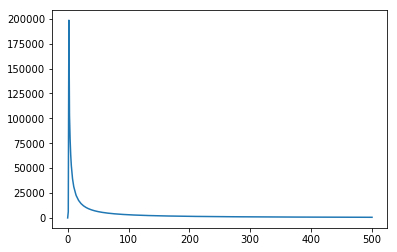

In [254]:
plt.plot(loss_history)

plt.show()